__Importing Packages and Loading Dataset__

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset and set headers (as named on uci irvine website)
headers = ['edible',
           'cap-shape',
           'cap-surface',
           'cap-color',
           'bruises',
           'odor',
           'gill-attachment',
           'gill-spacing',
           'gill-size',
           'gill-color',
           'stalk-shape',
           'stalk-root',
           'stalk-surface-above-ring',
           'stalk-surface-below-ring',
           'stalk-color-above-ring',
           'stalk-color-below-ring',
           'veil-type',
           'veil-color',
           'ring-number',
           'ring-type',
           'spore-print-color',
           'population',
           'habitat']
mushroom_dataset = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                   names=headers, index_col=False, na_values=' ?')

In [3]:
mushroom_dataset

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
print(mushroom_dataset.shape)

(8124, 23)


We will now check for null values, and drop them if there are any.

In [5]:
mushroom_dataset.dropna(inplace=True)

In [6]:
print(mushroom_dataset.shape)

(8124, 23)


As we can see, there are no null values in the dataset, hence we have the same shape. We will now check the types of the features to see if any are categorical.

In [7]:
mushroom_dataset.dtypes

edible                      object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Because there are categorical features present, we will convert these to numerical values using dummy variables. 

In [8]:
# create dummy variables 
mushroom_dataset = pd.get_dummies(mushroom_dataset)

In [9]:
mushroom_dataset

,edible_e,edible_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [10]:
print(mushroom_dataset.shape)

(8124, 119)


__Helper Functions__

In [11]:
# function to draw heatmap for linear svm
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [12]:
# function to draw heatmap for rbf svm
def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show() 

In [13]:
# function to draw heatmap for k nearest neighbors
def draw_heatmap_KNN(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [14]:
# function to draw heatmap for decision tree
def draw_heatmap_decisionTree(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t $depth$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [15]:
# function to draw heatmap for random forest
def draw_heatmap_randomForest(acc, acc_desc, f_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=f_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='features')
    plt.title(acc_desc + ' w.r.t $features$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [16]:
# function for linear svm
def linearSVM():
    # create the classifier and perform gridsearch to obtain an optimal C
    classifier = svm.SVC(kernel='linear')
    C_list = np.array([10**-3, 10**-2, 10**-1,10**0,10**1,10**2, 10**3]) # Different C to try.
    params = {"C": C_list}

    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val,Y_train_val)
    
    # draw heatmaps for the training and validation results 
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_linear(train_acc.reshape(-1,1), 'linear svm train accuracy', C_list)

    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_linear(val_acc.reshape(-1,1), 'linear svm val accuracy', C_list)
    
    # get the training and validation accuracy associated with the best C
    for i,val in enumerate(C_list):
        if val == grid.best_params_['C']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal C to get the most optimal test accuracy
    op_classifier = svm.SVC(kernel = 'linear', C = grid.best_params_['C'] )
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['C']

In [17]:
# function for rbf svm
def rbfSVM():
    # create the classifier and perform gridsearch to obtain an optimal C and gamme
    classifier = svm.SVC(kernel = 'rbf')
    gamma_list     = np.array([0.001,0.005,0.01,0.05,0.1,0.5,1,2]) # Different gamma to try.
    C_list = np.array([10**-3, 10**-2, 10**-1,10**0,10**1,10**2,10**3]) # Different C to try.
    param_grid = dict(gamma=gamma_list, C=C_list)
    
    grid = GridSearchCV(estimator = classifier, param_grid = param_grid, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val,Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score'].reshape(7,8)
    draw_heatmap_RBF(train_acc, 'rbf svm train accuracy', gamma_list, C_list)

    val_acc = grid.cv_results_['mean_test_score'].reshape(7,8)
    draw_heatmap_RBF(val_acc, 'rbf svm val accuracy',gamma_list, C_list)
    
    # get the training and validation accuracy associated with the best C and gamma
    for i,val in enumerate(C_list):
        for j, val2 in enumerate(gamma_list):
            if ((val == grid.best_params_['C']) and (val2 == grid.best_params_['gamma'])):
                best_train_acc = train_acc[i,j]
                best_val_acc = val_acc[i,j]
    
    # train the classifier on the most optimal C and gamma to get the most optimal test accuracy 
    op_classifier = svm.SVC(kernel = 'rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['C'], grid.best_params_['gamma']

In [18]:
# function for k nearest neighbors 
def knn():
    # create the classifier and perform gridsearch to obtain an optimal number of neighbors
    k_list = [1,2,3,4,5,6,7,8,9,10]
    params = {"n_neighbors": k_list}
    classifier = KNeighborsClassifier()
    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_KNN(train_acc.reshape(10,1), 'knn train accuracy', k_list)
    
    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_KNN(val_acc.reshape(10,1), 'knn val accuracy', k_list)
    
    # get the training and validation accuracy associated with the best number of neighbors
    for i,val in enumerate(k_list):
        if val == grid.best_params_['n_neighbors']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal number of neighbors to get the most optimal test accuracy
    op_classifier = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
    op_classifier.fit(X_train_val,Y_train_val)
    test_acc = op_classifier.score(X_test,Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['n_neighbors']

In [19]:
# function for decision tree
def decisionTree():
    # create the classifier and perform gridsearch to obtain an optimal  depth
    classifier = tree.DecisionTreeClassifier()
    D_list = [1,2,3,4,5]
    param_grid = {
                  "max_depth": D_list,
                  "criterion": ["entropy"]
                 }
    grid = GridSearchCV(classifier, param_grid, return_train_score = True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_decisionTree(train_acc.reshape(-1,1), 'decision tree train accuracy', D_list)

    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_decisionTree(val_acc.reshape(-1,1), 'decision tree val accuracy', D_list)
    
    # get the training and validation accuracy associated with the best depth
    for i,val in enumerate(D_list):
        if val == grid.best_params_['max_depth']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal depth to get the most optimal test accuracy
    op_classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = grid.best_params_['max_depth'])
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['max_depth']

In [20]:
# function for random forest
def randomForest():
    # create the classifier and perform gridsearch to obtain an optimal number of features
    f_list = [1,2,4,6,8,12,16, 20]
    params = {"max_features": f_list}
    classifier = RandomForestClassifier(n_estimators = 1024)
    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_randomForest(train_acc.reshape(8,1), 'random forest train accuracy', f_list)
    
    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_randomForest(val_acc.reshape(8,1), 'random forest val accuracy', f_list)
    
    # get the training and validation accuracy associated with the best number of features
    for i,val in enumerate(f_list):
        if val == grid.best_params_['max_features']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal number of features to get the most optimal test accuracy
    op_classifier = RandomForestClassifier(max_features=grid.best_params_['max_features'])
    op_classifier.fit(X_train_val,Y_train_val)
    test_acc = op_classifier.score(X_test,Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['max_features']

__Heatmaps and Final Reults__

Train Partition:  0.8


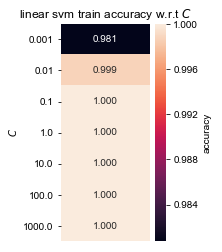

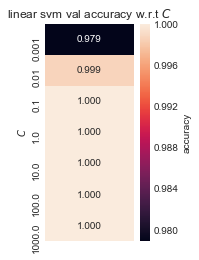

Test Accuracy for Linear SVM =  1.0


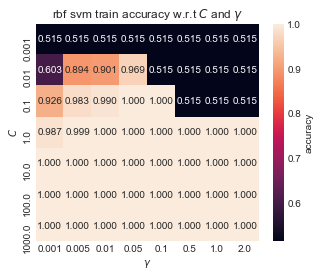

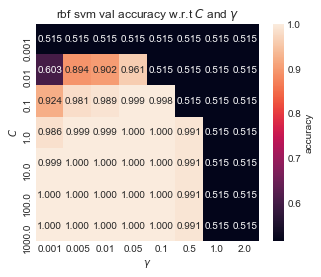

Test Accuracy for RBF SVM =  1.0


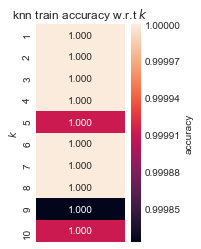

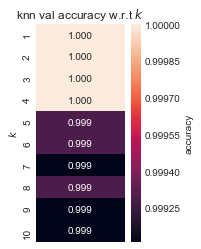

Test Accuracy for K Nearest Neighbors =  1.0


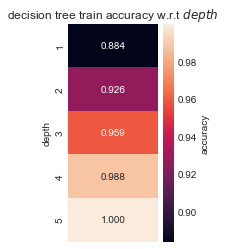

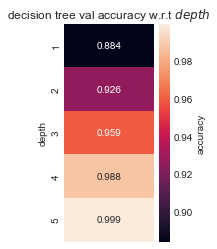

Test Accuracy for Decision Tree =  1.0


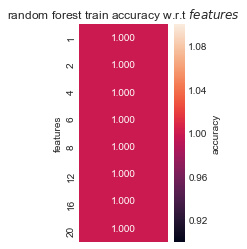

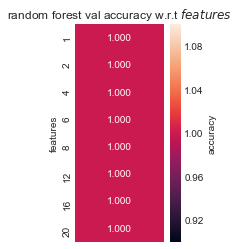

Test Accuracy for Random Forest =  1.0


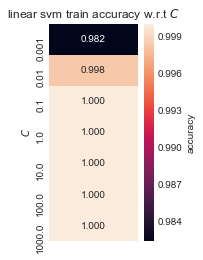

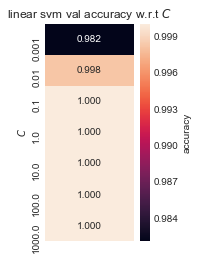

Test Accuracy for Linear SVM =  1.0


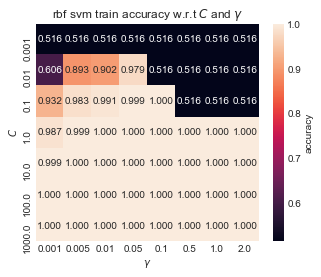

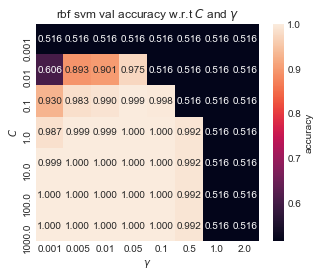

Test Accuracy for RBF SVM =  1.0


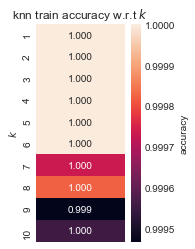

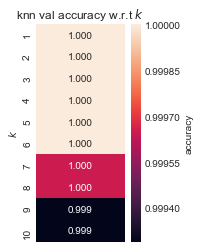

Test Accuracy for K Nearest Neighbors =  1.0


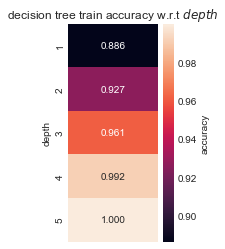

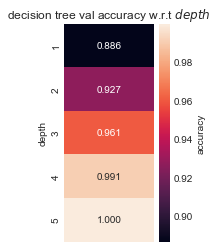

Test Accuracy for Decision Tree =  1.0


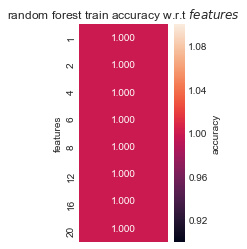

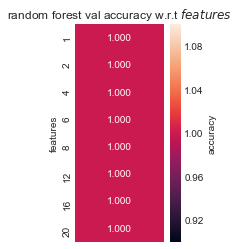

Test Accuracy for Random Forest =  1.0


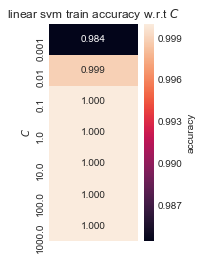

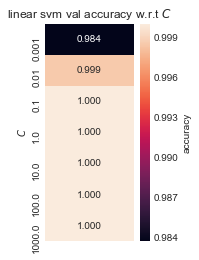

Test Accuracy for Linear SVM =  1.0


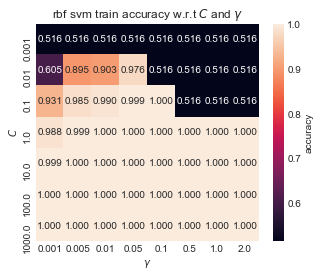

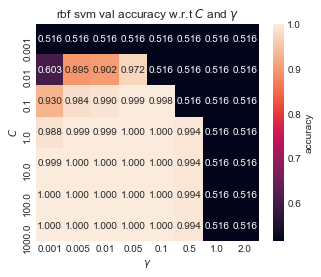

Test Accuracy for RBF SVM =  1.0


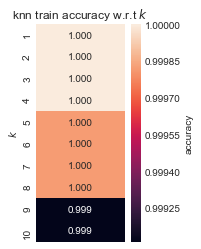

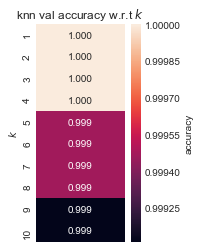

Test Accuracy for K Nearest Neighbors =  1.0


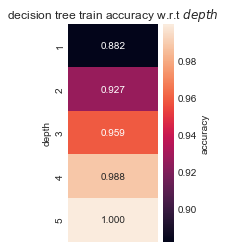

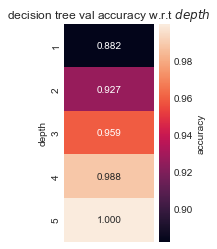

Test Accuracy for Decision Tree =  0.9992902767920511


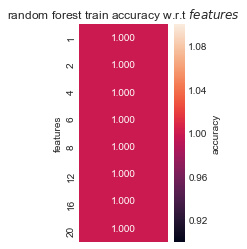

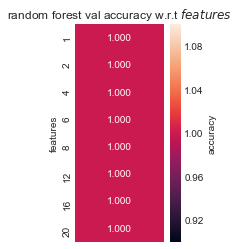

Test Accuracy for Random Forest =  1.0
Train Partition:  0.5


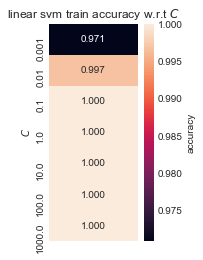

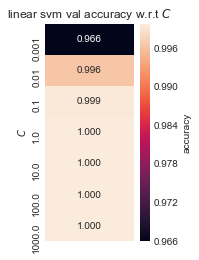

Test Accuracy for Linear SVM =  1.0


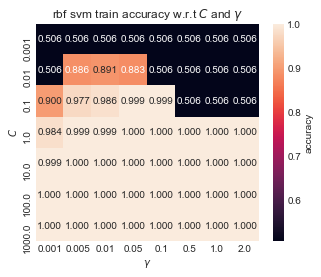

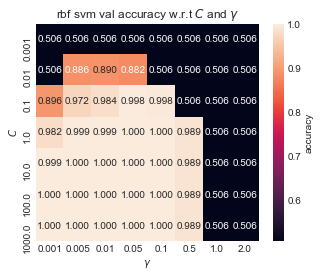

Test Accuracy for RBF SVM =  1.0


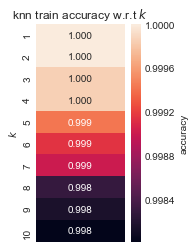

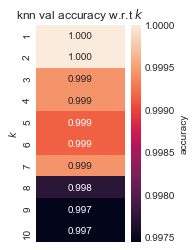

Test Accuracy for K Nearest Neighbors =  1.0


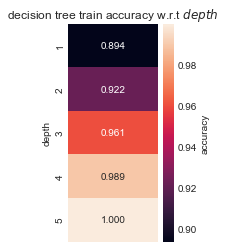

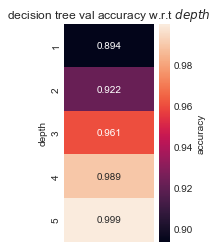

Test Accuracy for Decision Tree =  0.9994321408290744


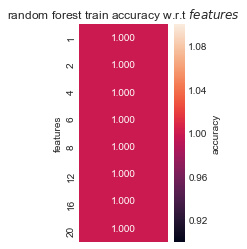

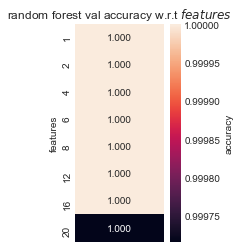

Test Accuracy for Random Forest =  1.0


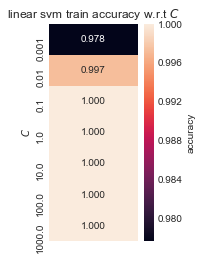

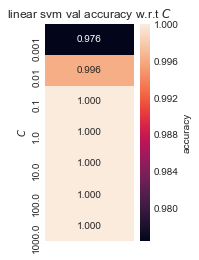

Test Accuracy for Linear SVM =  1.0


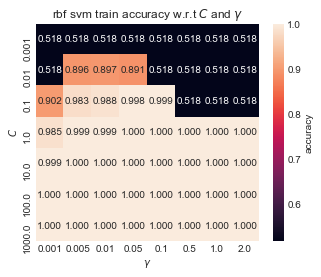

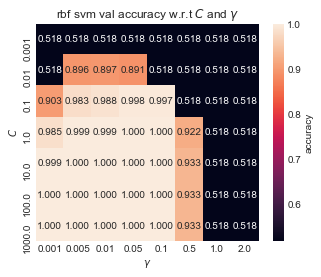

Test Accuracy for RBF SVM =  1.0


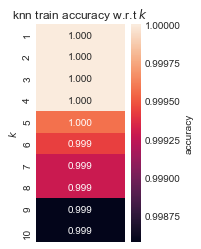

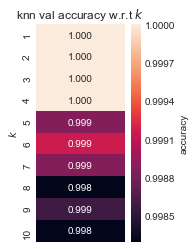

Test Accuracy for K Nearest Neighbors =  1.0


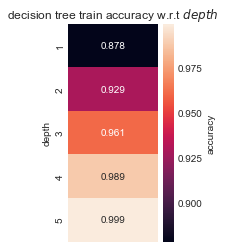

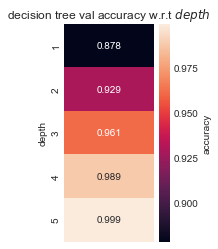

Test Accuracy for Decision Tree =  0.9997160704145373


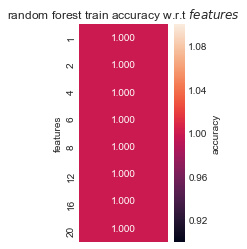

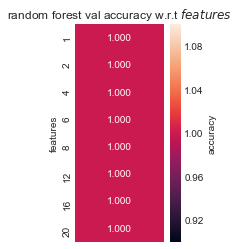

Test Accuracy for Random Forest =  1.0


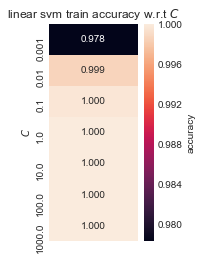

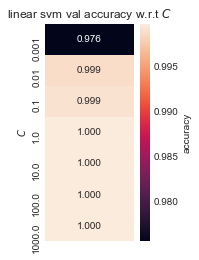

Test Accuracy for Linear SVM =  1.0


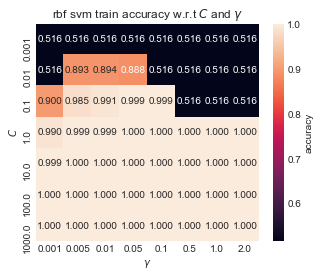

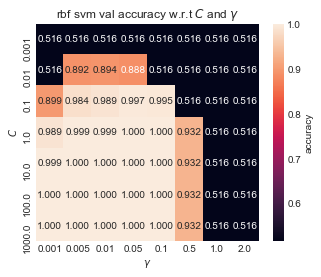

Test Accuracy for RBF SVM =  1.0


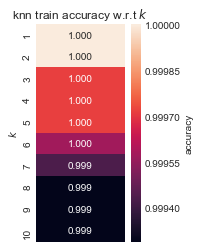

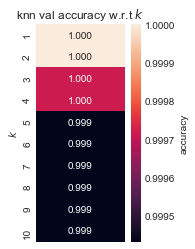

Test Accuracy for K Nearest Neighbors =  1.0


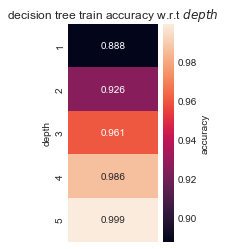

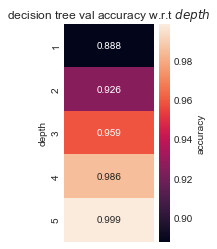

Test Accuracy for Decision Tree =  1.0


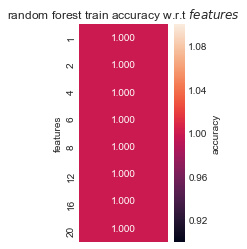

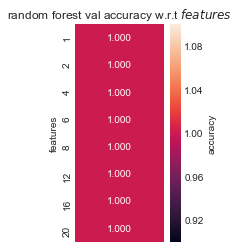

Test Accuracy for Random Forest =  0.9997160704145373
Train Partition:  0.2


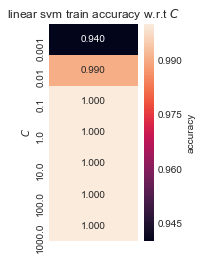

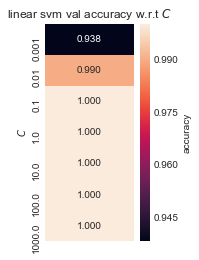

Test Accuracy for Linear SVM =  0.9987579843860894


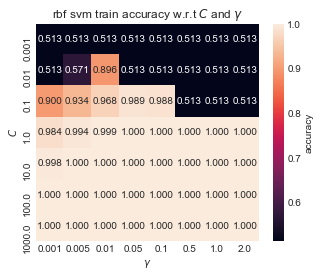

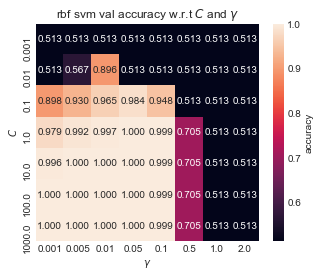

Test Accuracy for RBF SVM =  0.9987579843860894


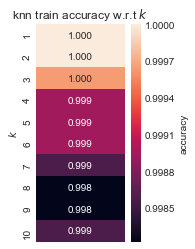

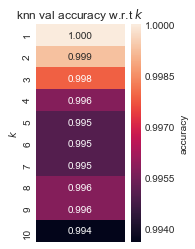

Test Accuracy for K Nearest Neighbors =  0.9987579843860894


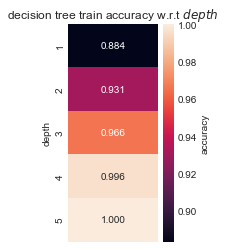

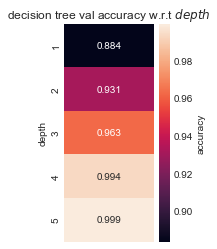

Test Accuracy for Decision Tree =  0.9987579843860894


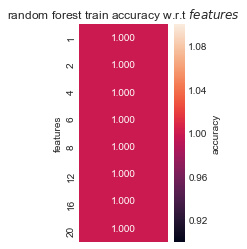

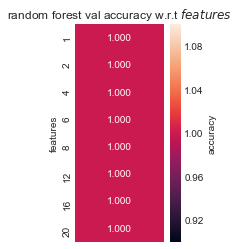

Test Accuracy for Random Forest =  0.9987579843860894


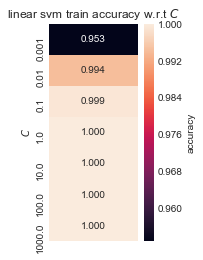

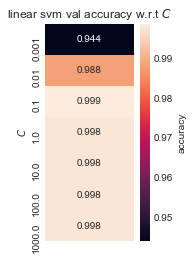

Test Accuracy for Linear SVM =  0.997693399574166


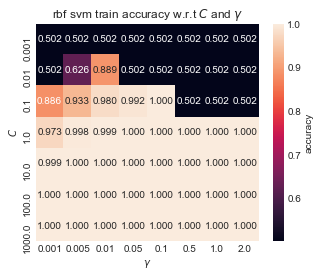

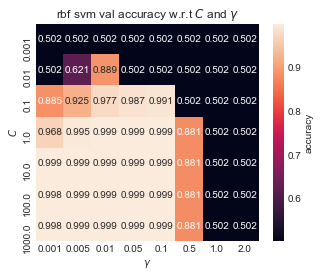

Test Accuracy for RBF SVM =  0.997693399574166


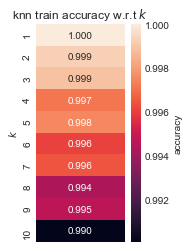

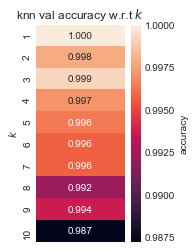

Test Accuracy for K Nearest Neighbors =  1.0


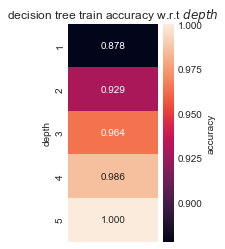

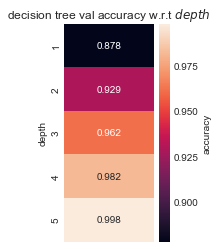

Test Accuracy for Decision Tree =  0.9991128459900639


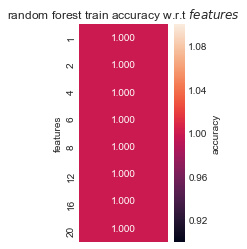

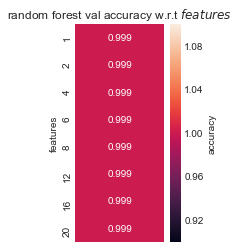

Test Accuracy for Random Forest =  0.9996451383960255


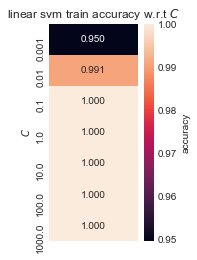

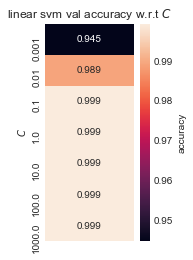

Test Accuracy for Linear SVM =  0.9994677075940384


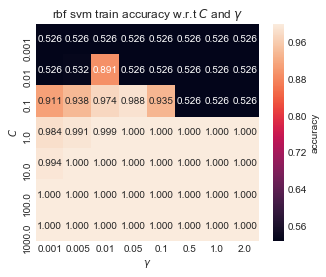

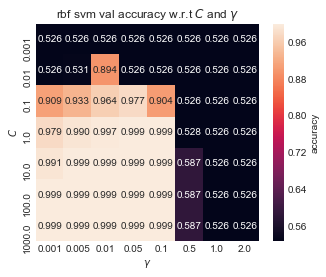

Test Accuracy for RBF SVM =  1.0


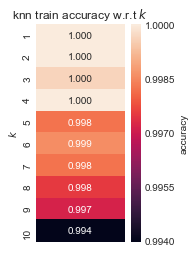

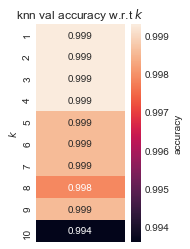

Test Accuracy for K Nearest Neighbors =  1.0


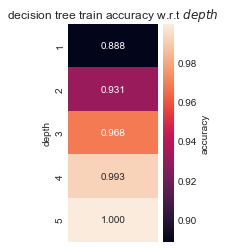

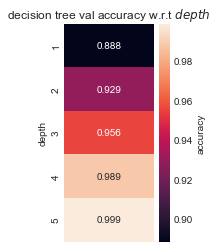

Test Accuracy for Decision Tree =  0.9994677075940384


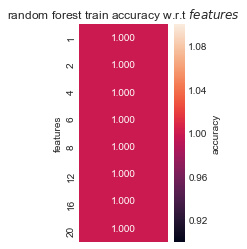

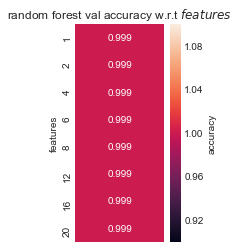

Test Accuracy for Random Forest =  1.0


In [22]:
# different train/test partitions 
partitions = [0.8,0.5,0.2]
test_acc_arr = np.zeros((3,5))
train_acc_arr = np.zeros((3,5))
val_acc_arr = np.zeros((3,5))
param_arr = np.zeros((9,6))

# shuffle the data
X_and_Y = mushroom_dataset.sample(frac=1)

X_and_Y = X_and_Y.loc[:2000]

# iterate through the different splits 
for i, partition in enumerate(partitions):
    print("Train Partition: ", partition)
    linear_svm_test_acc = []
    rbf_svm_test_acc = []
    knn_test_acc = []
    decision_tree_test_acc = []
    random_forest_test_acc = []
    
    # do three trials for each classifier
    for trial in range(3):
        
        X_and_Y = X_and_Y.sample(frac=1)
        
        X = X_and_Y.iloc[:,2:] # Second column to last column: Features (numerical values) 
        Y = X_and_Y.iloc[:,0] # make edible_e class variable (1 for edible, 0 if poisonous)
        
        train_size = int(partition*len(X)) #Find the point where to partition the data
        
        X_train_val = X[:train_size]
        X_test      = X[train_size:]
        Y_train_val = Y[:train_size]
        Y_test      = Y[train_size:]
        
        # scale values from -1 to 1 
        scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train_val)
        X_train_val = scaling.transform(X_train_val)
        X_test = scaling.transform(X_test)
        
        # call each functionn and save the values returnred in appropriate arrays
        test_acc,best_train_0, best_val_0, param_0 = linearSVM()
        linear_svm_test_acc.append(test_acc)
        param_arr[i*3 + trial, 0] = param_0
        print("Test Accuracy for Linear SVM = ", test_acc)
        
        test_acc,best_train_1, best_val_1, param_1, param_2 = rbfSVM()
        rbf_svm_test_acc.append(test_acc)
        param_arr[i*3 + trial, 1] = param_1
        param_arr[i*3 + trial, 2] = param_2
        print("Test Accuracy for RBF SVM = ", test_acc)
        
        test_acc,best_train_2,best_val_2, param_3 = knn()
        knn_test_acc.append(test_acc)
        param_arr[i*3 + trial, 3] = param_3
        print("Test Accuracy for K Nearest Neighbors = ", test_acc)
        
        test_acc,best_train_3,best_val_3, param_4 = decisionTree()
        decision_tree_test_acc.append(test_acc)
        param_arr[i*3 + trial, 4] = param_4
        print("Test Accuracy for Decision Tree = ", test_acc)

        test_acc, best_train_4, best_val_4, param_5 = randomForest()
        random_forest_test_acc.append(test_acc)
        param_arr[i*3 + trial, 5] = param_5
        print("Test Accuracy for Random Forest = ", test_acc)

    
    # get the average accuracy over the three rounds for training, testing, and validation
    test_acc_arr[i, 0] = sum(linear_svm_test_acc)/3
    test_acc_arr[i, 1] = sum(rbf_svm_test_acc)/3
    test_acc_arr[i, 2] = sum(knn_test_acc)/3
    test_acc_arr[i, 3] = sum(decision_tree_test_acc)/3
    test_acc_arr[i, 4] = sum(random_forest_test_acc)/3

    train_acc_arr[i, 0] = best_train_0
    train_acc_arr[i, 1] = best_train_1
    train_acc_arr[i, 2] = best_train_2
    train_acc_arr[i, 3] = best_train_3
    train_acc_arr[i, 4] = best_train_4

    val_acc_arr[i, 0] = best_val_0
    val_acc_arr[i, 1] = best_val_1
    val_acc_arr[i, 2] = best_val_2
    val_acc_arr[i, 3] = best_val_3
    val_acc_arr[i, 4] = best_val_4

In [23]:
train_df = pd.DataFrame(train_acc_arr)
train_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
train_df.index.name = 'Train Partition'
train_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
train_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,1.0,1.0,1.0,0.999823,1.0
50,1.0,1.0,1.0,0.999432,1.0
20,1.0,1.0,1.0,0.999645,1.0


In [24]:
val_df = pd.DataFrame(val_acc_arr)
val_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
val_df.index.name = 'Train Partition'
val_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
val_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,1.000000,1.00000,1.00000,0.999645,1.000000
50,0.999716,1.00000,1.00000,0.998580,0.999716
20,0.999290,0.99929,0.99929,0.998580,0.999290


In [25]:
test_df = pd.DataFrame(test_acc_arr)
test_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
test_df.index.name = 'Train Partition'
test_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
test_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,1.00000,1.000000,1.000000,0.999763,1.000000
50,1.00000,1.000000,1.000000,0.999716,0.999905
20,0.99864,0.998817,0.999586,0.999113,0.999468


In [26]:
param_df = pd.DataFrame(param_arr)
param_df.columns = ['C-Linear SVM', 'C-RBF SVM', 'Gamma-RBF SVM','K-K Nearest Neighbors', 
                    'Depth-Decision Tree', 'Features-Random Forest']
param_df.index.name = 'Train Partition'
param_df.rename(index = {0: "80", 1:"80",2 : "80", 3: "50", 4:"50", 5: "50", 6: "20", 7:"20", 8: "20"},inplace = True)
param_df

,C-Linear SVM,C-RBF SVM,Gamma-RBF SVM,K-K Nearest Neighbors,Depth-Decision Tree,Features-Random Forest
Train Partition,,,,,,
80,0.1,1.0,0.050,1.0,5.0,1.0
80,0.1,1.0,0.050,1.0,5.0,1.0
80,0.1,1.0,0.050,1.0,5.0,1.0
50,1.0,1.0,0.050,1.0,5.0,1.0
50,0.1,1.0,0.050,1.0,5.0,1.0
50,1.0,10.0,0.005,1.0,5.0,1.0
20,0.1,1.0,0.050,1.0,5.0,1.0
20,0.1,1.0,0.010,1.0,5.0,1.0
20,0.1,1.0,0.050,1.0,5.0,1.0
